In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("DS1_C5_S3_BazilHousing_Data_Hackathon.csv")
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


# level 0 analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [4]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [5]:
df.count()

city                   10692
area                   10692
rooms                  10692
bathroom               10692
parking spaces         10692
floor                  10692
animal                 10692
furniture              10692
hoa (R$)               10692
rent amount (R$)       10692
property tax (R$)      10692
fire insurance (R$)    10692
total (R$)             10692
dtype: int64

In [6]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [7]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [8]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [9]:
df.shape

(10692, 13)

# level 1 analysis

In [10]:
#splitting data into categorical and numerical

In [11]:
def separate_data(df):
    categorical = []
    continuous = []
    for i in df.columns:
        if df[i].nunique() < 10:
            categorical.append(i)
        else:
            continuous.append(i)
    return categorical, continuous

categorical, continuous = separate_data(df)

from tabulate import tabulate

table=[categorical,continuous]
print(tabulate({"categorical":categorical, "continuous":continuous}, headers=["categorical","continuous"]))

categorical    continuous
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


In [12]:
def info_cat(col):           
    print(col)
    print("Unique values:", df[col].unique())
    print("Mode(most repeated values):", df[col].mode()[0])
    print("Missing values:",df[col].isnull().sum())

In [13]:
info_cat("city")

city
Unique values: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode(most repeated values): São Paulo
Missing values: 0


In [14]:
info_cat("animal")

animal
Unique values: ['acept' 'not acept']
Mode(most repeated values): acept
Missing values: 0


In [15]:
info_cat("furniture")

furniture
Unique values: ['furnished' 'not furnished']
Mode(most repeated values): not furnished
Missing values: 0


In [16]:
#numerical

In [17]:
def info_num(col):                    #numerical
    print(col)
    print("Mean:",df[col].mean())
    print("Median:",df[col].median())
    print("Mode", df[col].mode()[0])
    print("Standard deviation:",df[col].std())
    print("Minimum value:",df[col].min())
    print("Maximum value:",df[col].max())
    print("Missing value:",df[col].isnull().sum())

In [18]:
info_num("area")

area
Mean: 149.21791994014217
Median: 90.0
Mode 50
Standard deviation: 537.0169423364867
Minimum value: 11
Maximum value: 46335
Missing value: 0


In [19]:
info_num("rooms")

rooms
Mean: 2.506079311634867
Median: 2.0
Mode 3
Standard deviation: 1.171266254098269
Minimum value: 1
Maximum value: 13
Missing value: 0


In [20]:
info_num("bathroom")

bathroom
Mean: 2.2368125701459034
Median: 2.0
Mode 1
Standard deviation: 1.4071981983604243
Minimum value: 1
Maximum value: 10
Missing value: 0


In [21]:
info_num("parking spaces")

parking spaces
Mean: 1.6091470258136924
Median: 1.0
Mode 1
Standard deviation: 1.5895207238054723
Minimum value: 0
Maximum value: 12
Missing value: 0


In [22]:
info_num("floor")

floor
Mean: 5.0679947624392065
Median: 3.0
Mode 0
Standard deviation: 6.069050243218268
Minimum value: 0
Maximum value: 301
Missing value: 0


In [23]:
info_num("hoa (R$)")

hoa (R$)
Mean: 1174.0216984661429
Median: 560.0
Mode 0
Standard deviation: 15592.305248403356
Minimum value: 0
Maximum value: 1117000
Missing value: 0


In [24]:
info_num("rent amount (R$)")

rent amount (R$)
Mean: 3896.247194163861
Median: 2661.0
Mode 2500
Standard deviation: 3408.5455176710816
Minimum value: 450
Maximum value: 45000
Missing value: 0


In [25]:
info_num("property tax (R$)")

property tax (R$)
Mean: 366.70435839880287
Median: 125.0
Mode 0
Standard deviation: 3107.832321161917
Minimum value: 0
Maximum value: 313700
Missing value: 0


In [26]:
info_num("floor")

floor
Mean: 5.0679947624392065
Median: 3.0
Mode 0
Standard deviation: 6.069050243218268
Minimum value: 0
Maximum value: 301
Missing value: 0


In [27]:
info_num("total (R$)")

total (R$)
Mean: 5490.4869996258885
Median: 3581.5
Mode 2555
Standard deviation: 16484.72591235027
Minimum value: 499
Maximum value: 1120000
Missing value: 0


In [28]:
def cat_chart(col):
    dist= df[col].value_counts()
    fig, ax=plt.subplots(1,2, figsize= (15,6))       #1,2 is for 1 row and 2 columns  #(15,6) is for the length and width of the graph
    ax[0].set_title("count of"+str(col))           #title
    labels= list(dist. index)                             #labels

    sns.countplot(x= df[col], ax= ax[0])      #this is from seaborn library
    plt.pie(dist, labels= labels, autopct="%0.2f%%")       #this is from plt

    plt.show()

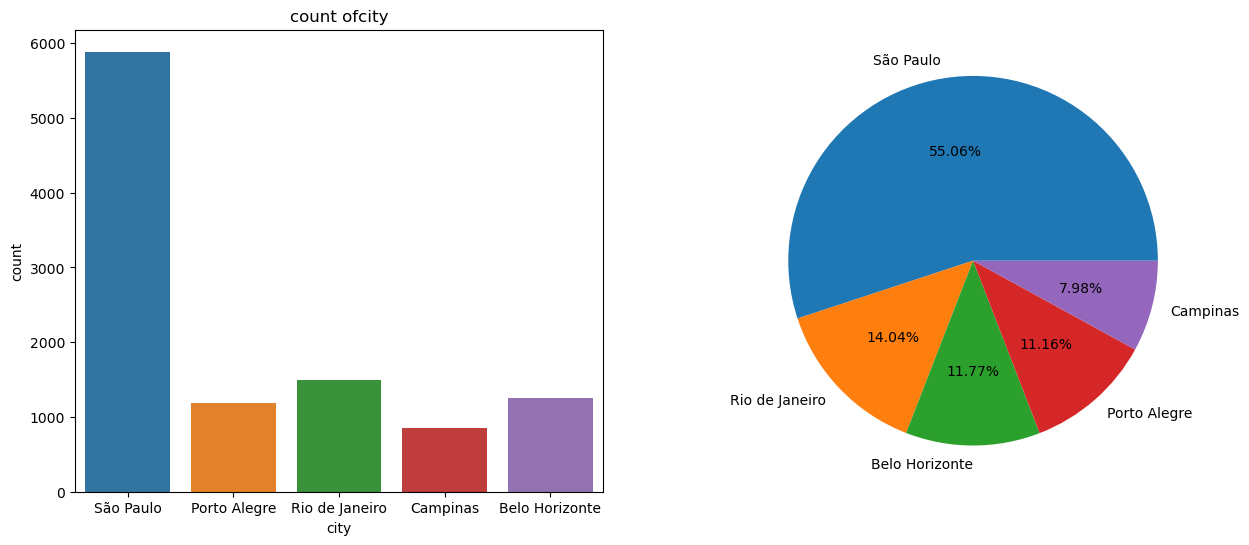

In [29]:
cat_chart("city")

# interpretation:
- most frequent city is São Paulo 

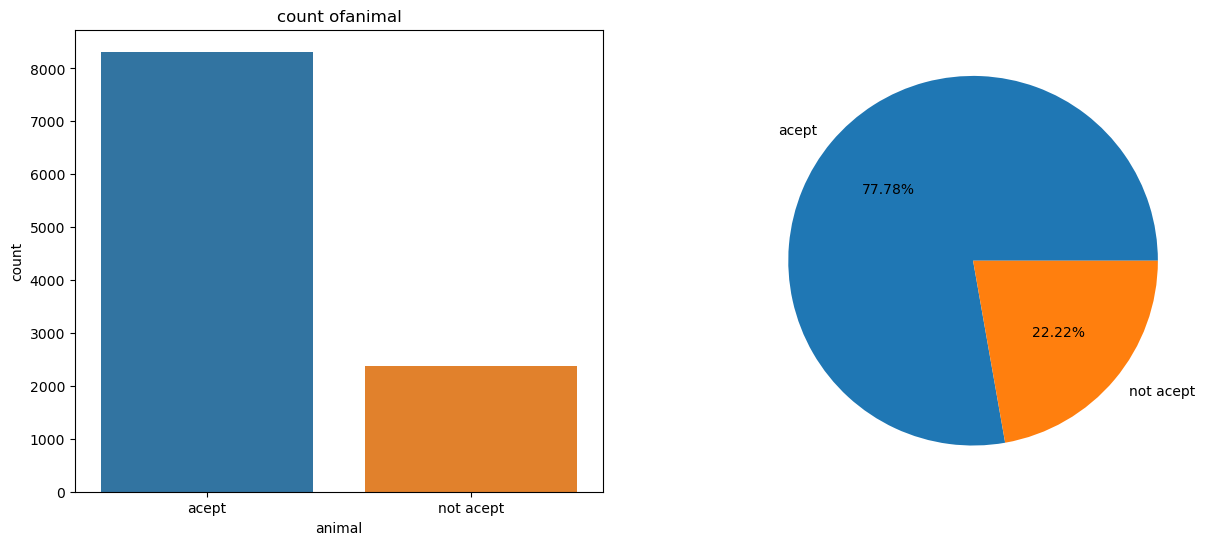

In [30]:
cat_chart("animal")

# interpretation:
-- Most of the cities accept animals

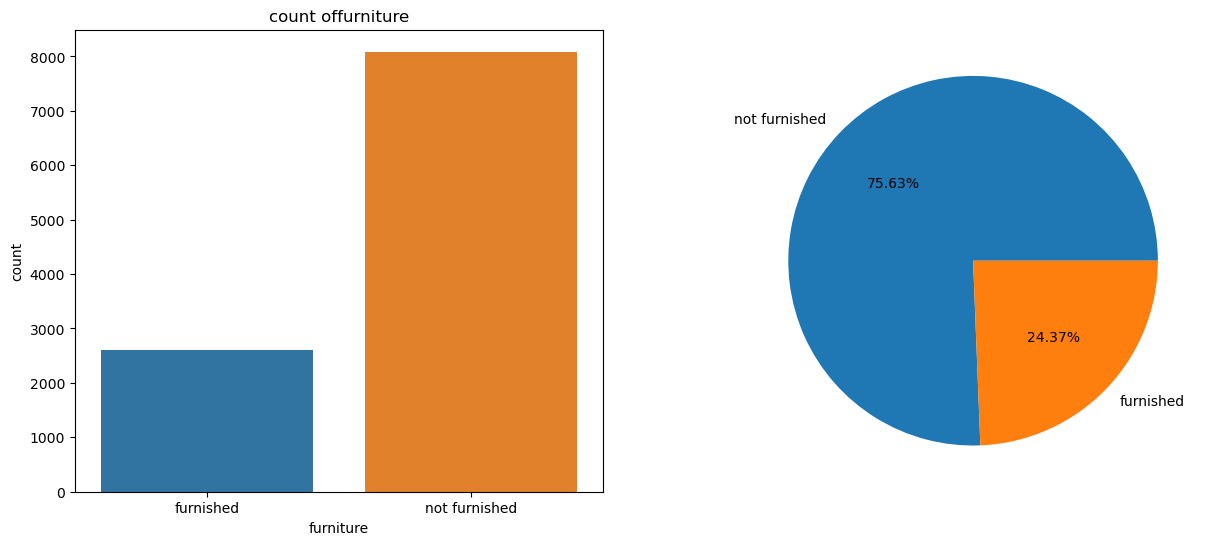

In [31]:
cat_chart("furniture")

# interpretation :
- most of the furniture is not furnished

# Numerical

In [32]:
def num_charts(col):
    fig, ax = plt.subplots(1,2, figsize=(15,8))
    sns.histplot(df[col], ax = ax[0], color= "m")
    sns.boxplot(df[col], ax = ax[1], color= "m")
    plt.show()

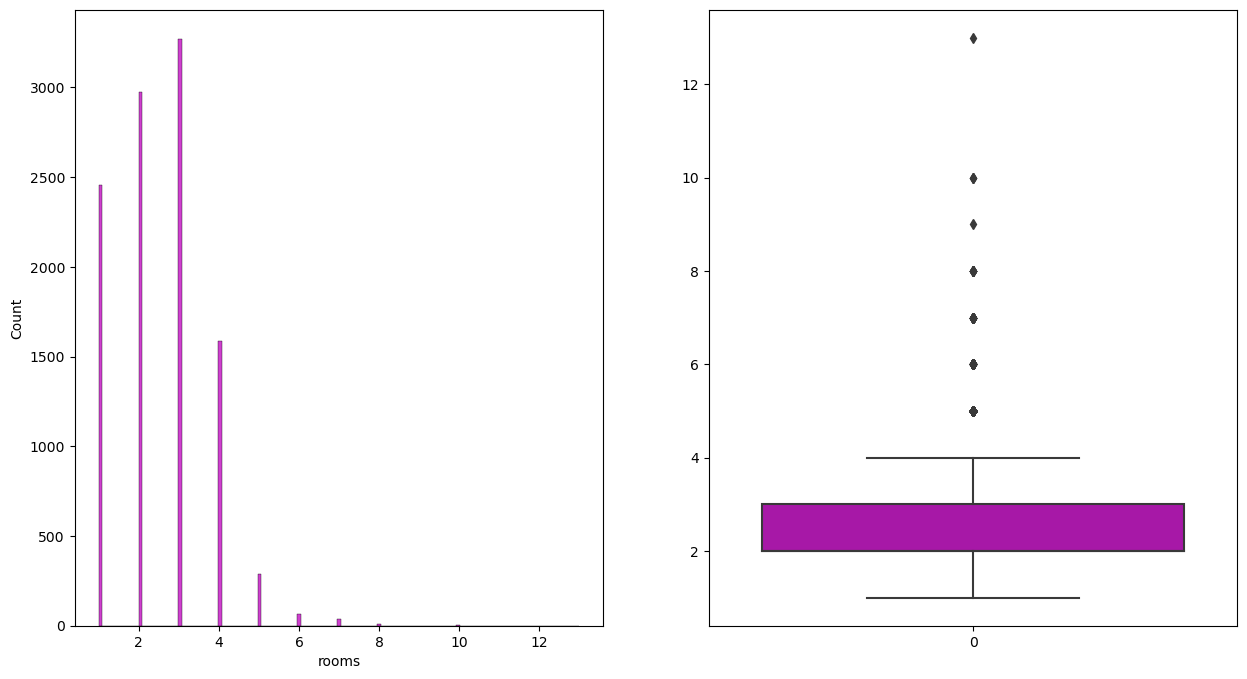

In [33]:
num_charts("rooms")

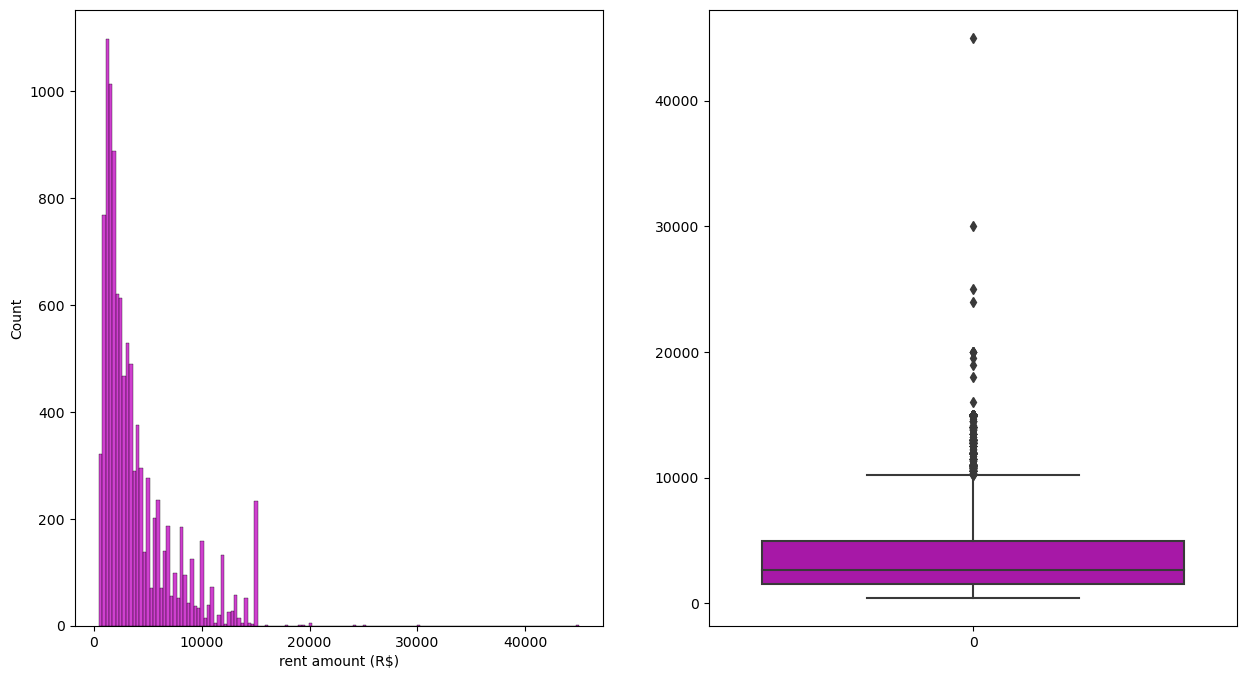

In [34]:
num_charts("rent amount (R$)")

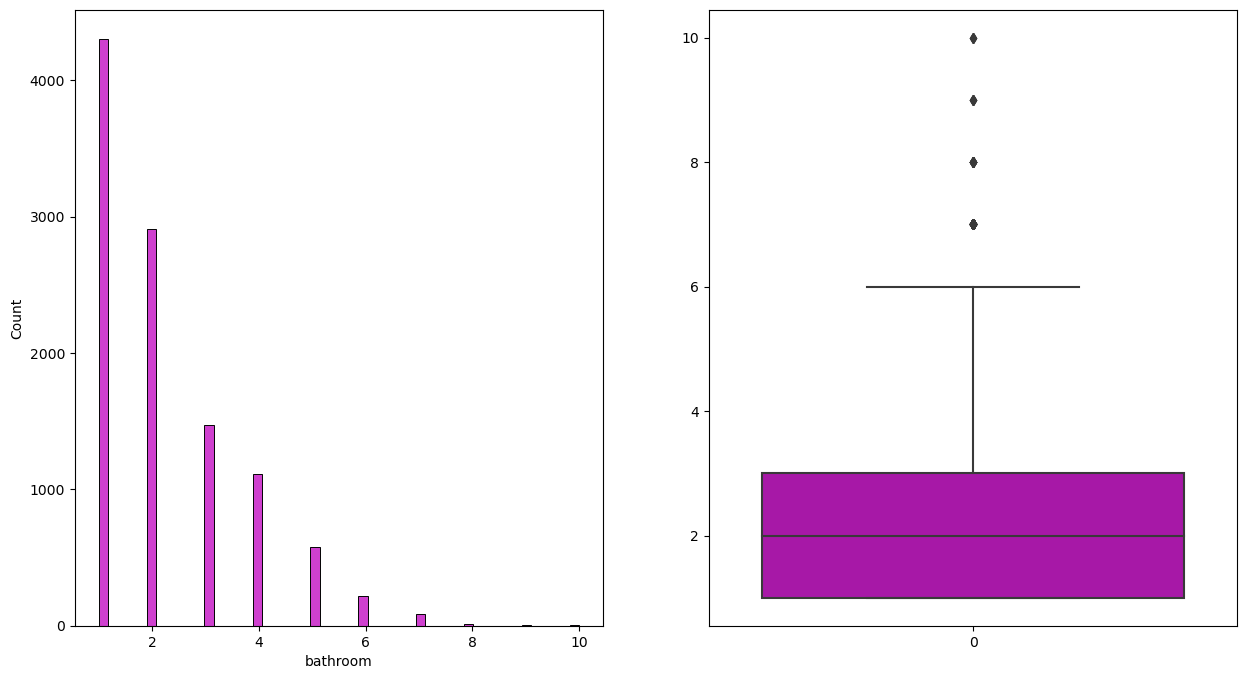

In [35]:
num_charts("bathroom")

# level 2

In [36]:
def cat_cat_analysis(col1,col2):
    fig, ax=plt.subplots(figsize=(15,8))
    sns.countplot(x=col1, hue = col2, data=df)
    plt.show()

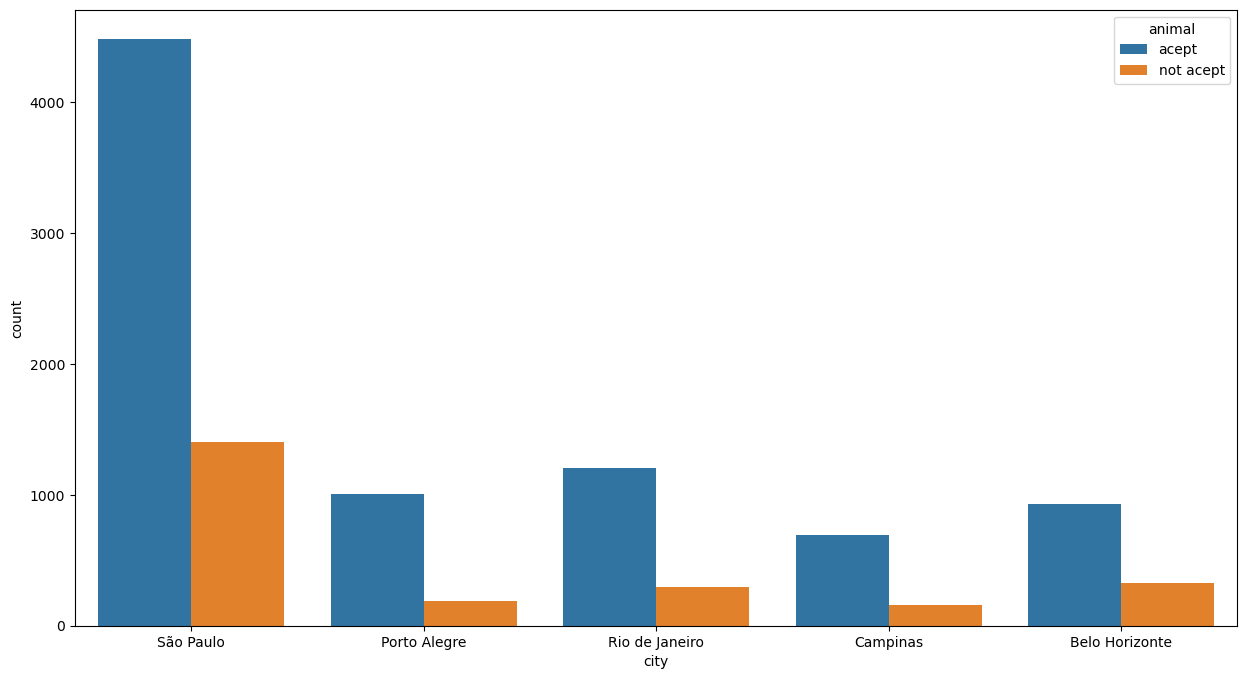

In [37]:
cat_cat_analysis("city","animal")

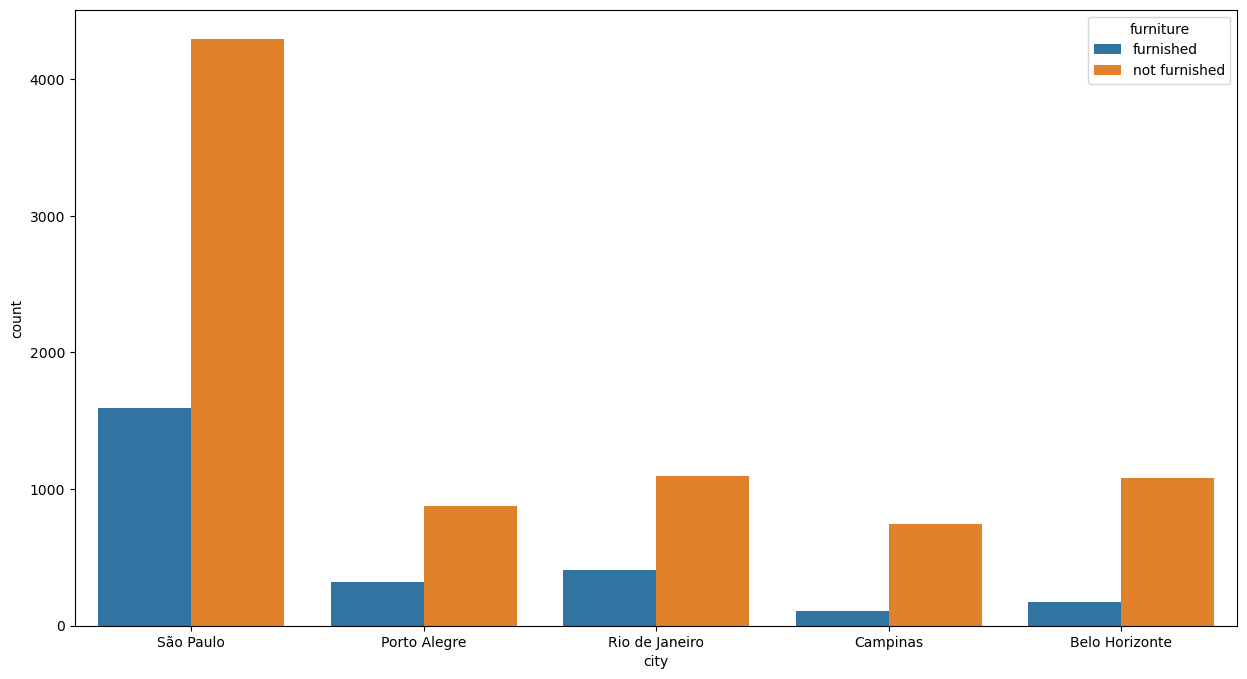

In [38]:
cat_cat_analysis("city","furniture")

# interpretation 
- most cities does not have furnished furniture

In [39]:
def num_num(num1, num2):
    plt.scatter(df[num1], df[num2])
    plt.title(num1+ "vs" + num2 )                                                    #stringwise concatination
    plt.xlabel(num1 + "   correlation value = "+str(df[num1].corr(df[num2])))         #stringwise concatination
    plt.ylabel(num2)
    plt.show()

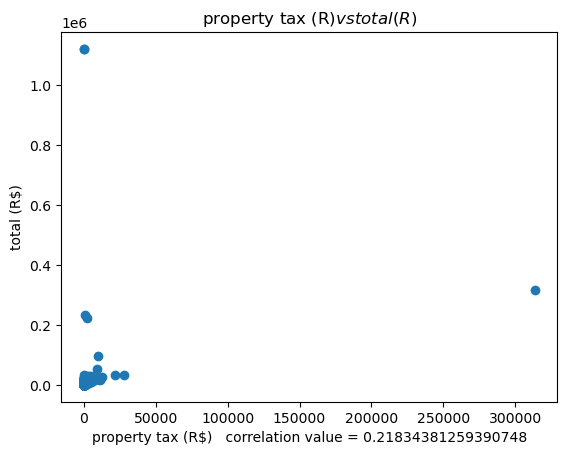

In [40]:
num_num("property tax (R$)","total (R$)")

In [41]:
# the correlation value close to 0

# level 3

In [42]:
#for bachelors

In [43]:
bachelors = df[(df["bathroom"]==1) & (df["rooms"]==1) & (df["parking spaces"]==1) & (df["furniture"]=="furnished")]

In [44]:
z=bachelors.sort_values("total (R$)")
z

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
4689,Belo Horizonte,30,1,1,1,2,not acept,furnished,0,860,0,12,872
920,Belo Horizonte,40,1,1,1,2,not acept,furnished,0,970,0,13,983
910,Belo Horizonte,40,1,1,1,2,not acept,furnished,0,970,0,13,983
10208,Campinas,35,1,1,1,0,not acept,furnished,0,1000,0,16,1016
9441,Porto Alegre,20,1,1,1,0,acept,furnished,0,950,75,14,1039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5031,São Paulo,50,1,1,1,10,not acept,furnished,1436,7800,359,99,9694
5136,São Paulo,83,1,1,1,15,not acept,furnished,4000,6000,255,77,10330
8078,São Paulo,50,1,1,1,10,not acept,furnished,1300,8800,250,112,10460
3518,São Paulo,47,1,1,1,3,acept,furnished,907,9200,313,117,10540


In [45]:
def cat_num_analysis_level3(cat, num):
    x=z.groupby(cat)[num].mean()
    fig, ax=plt.subplots(2,2, figsize=(15,10))
    sns.histplot(x= z[num], hue=z[cat], ax=ax[0,0])
    sns.boxplot(y= z[num], x=z[cat], ax=ax[0,1])
    sns.barplot(x= cat, y=num, data= z, estimator=np.mean, ax=ax[1,0])
    ax[1,1].pie(x, labels=x.index, autopct= "%0.2f%%")
    plt.show()

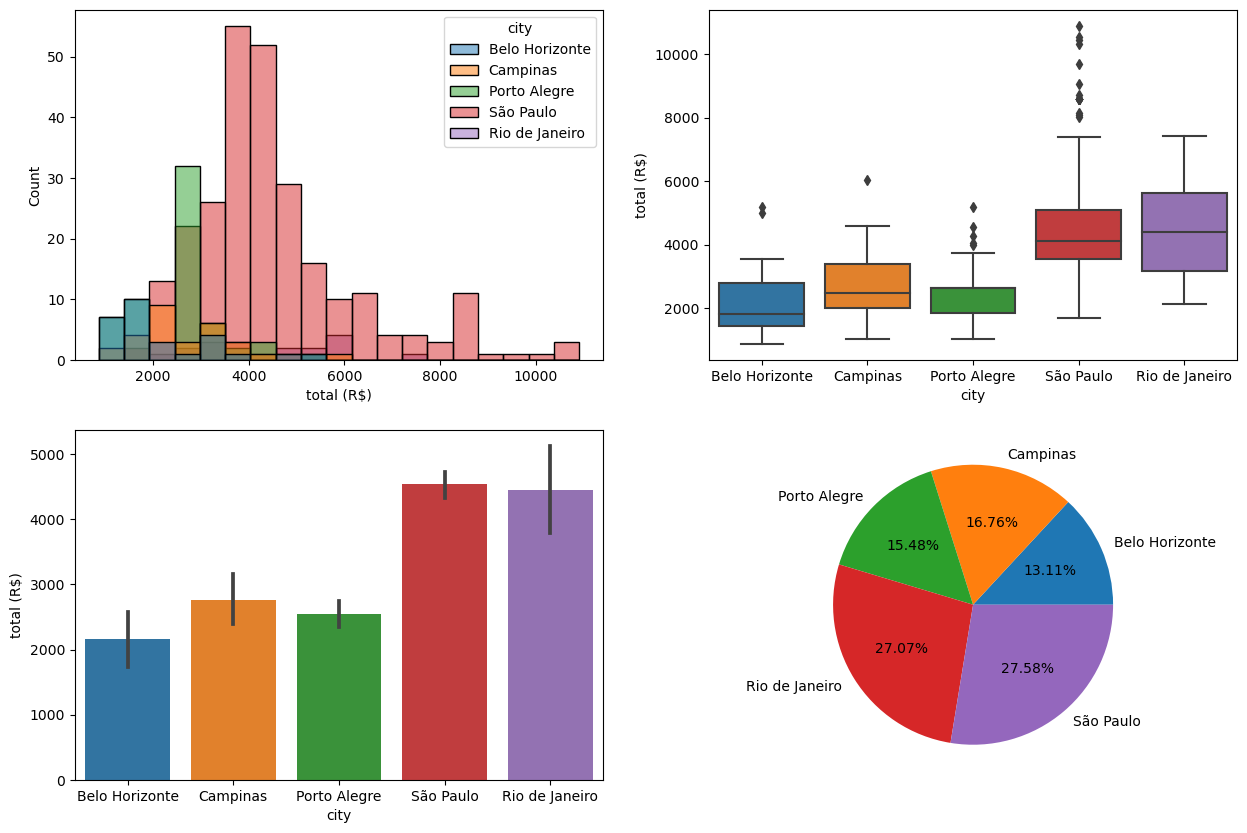

In [46]:
cat_num_analysis_level3("city","total (R$)")

Based on my analysis, the city, Belo Horizonto emerge as suitable options for bachelors
This city provide decent area, parking space , furnished furniture for a bachelor


# For middle_sized family

In [47]:
middle_sized = df[(df["bathroom"]==1) & (df["rooms"]==2) & (df["parking spaces"]==1) & (df["furniture"]=="furnished")]

In [48]:
middle_sized

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
103,Rio de Janeiro,90,2,1,1,1,acept,furnished,850,3468,191,45,4554
108,Porto Alegre,70,2,1,1,3,acept,furnished,360,2400,30,36,2826
559,São Paulo,65,2,1,1,8,acept,furnished,600,1700,92,22,2414
618,São Paulo,117,2,1,1,5,not acept,furnished,720,2700,11,35,3466
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,Belo Horizonte,70,2,1,1,0,acept,furnished,0,1400,0,23,1423
10445,Rio de Janeiro,62,2,1,1,4,not acept,furnished,600,1600,50,21,2271
10597,São Paulo,66,2,1,1,10,not acept,furnished,700,3800,84,27,4611
10665,Belo Horizonte,55,2,1,1,2,not acept,furnished,200,1600,75,22,1897


In [49]:
middle_sized_sorted=middle_sized.sort_values("total (R$)") 
middle_sized_sorted

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
4055,Belo Horizonte,60,2,1,1,1,acept,furnished,200,1040,0,14,1254
772,Porto Alegre,55,2,1,1,0,acept,furnished,0,1300,34,24,1358
9109,Porto Alegre,54,2,1,1,8,acept,furnished,300,1000,50,15,1365
5154,Campinas,57,2,1,1,1,acept,furnished,370,1000,36,13,1419
10395,Belo Horizonte,70,2,1,1,0,acept,furnished,0,1400,0,23,1423
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8229,São Paulo,140,2,1,1,6,not acept,furnished,2000,5500,300,70,7870
4004,São Paulo,80,2,1,1,2,not acept,furnished,1036,7450,98,95,8679
8623,São Paulo,75,2,1,1,4,acept,furnished,2065,6000,600,77,8742
2426,São Paulo,128,2,1,1,9,acept,furnished,1200,8500,9,108,9817


In [50]:
#for mid_size family  both Belo horionte and porto Alegre cities are suitable

In [51]:
def cate_numerical_analysis_level3(cat, num):
    x=middle_sized_sorted.groupby(cat)[num].mean()
    fig, ax=plt.subplots(2,2, figsize=(15,10))
    sns.histplot(x= middle_sized_sorted[num], hue=middle_sized_sorted[cat], ax=ax[0,0])
    sns.boxplot(y= middle_sized_sorted[num], x=middle_sized_sorted[cat], ax=ax[0,1])
    sns.barplot(x= cat, y=num, data= middle_sized_sorted, estimator=np.mean, ax=ax[1,0])
    ax[1,1].pie(x, labels=x.index, autopct= "%0.2f%%")
    plt.show()

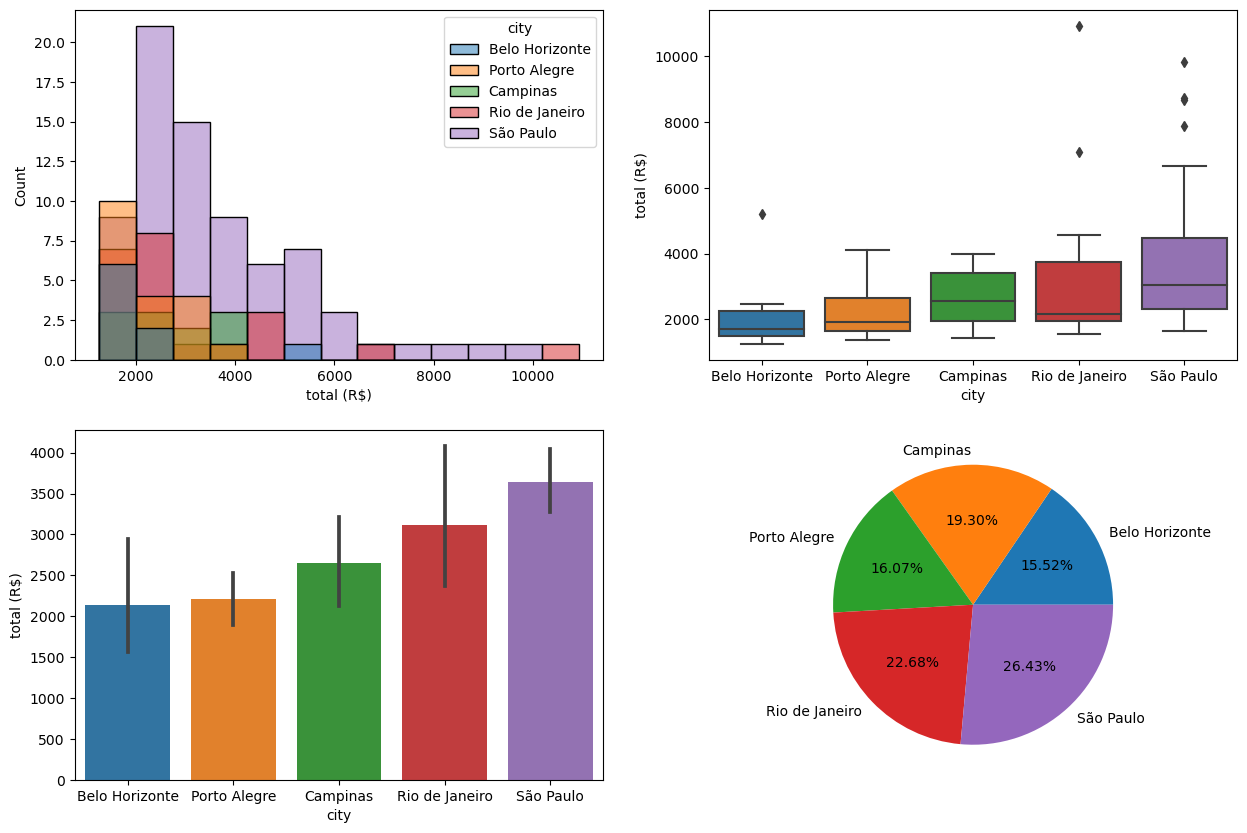

In [52]:
cate_numerical_analysis_level3("city","total (R$)")

Based on my analysis, the cities such as, Belo Horizonto and Porto Alegre emerge as suitable options for Mid-Sized Families
These cities offer decent rooms, furniture which is furnished
These cities also accept pets so it will be very suitable for a mid-sized family


# large_families

In [53]:
large_families = df[(df["bathroom"]==3) & (df["rooms"]==4) & (df["furniture"]=="furnished")]

In [54]:
large_fam_sorted=large_families.sort_values("total (R$)")
large_fam_sorted

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
7211,Porto Alegre,220,4,3,1,0,not acept,furnished,230,2000,0,36,2266
8751,Belo Horizonte,192,4,3,3,2,acept,furnished,412,2400,196,32,3040
4271,Rio de Janeiro,103,4,3,0,0,acept,furnished,800,2150,97,28,3075
807,Belo Horizonte,298,4,3,2,3,acept,furnished,330,2500,300,34,3164
10276,Porto Alegre,116,4,3,1,3,acept,furnished,450,2700,64,40,3254
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,São Paulo,540,4,3,5,0,acept,furnished,1900,14000,3534,211,19650
1719,Belo Horizonte,230,4,3,4,7,acept,furnished,3100,15000,1500,200,19800
4008,Rio de Janeiro,405,4,3,2,1,acept,furnished,4032,14000,1649,181,19860
6651,São Paulo,380,4,3,2,12,not acept,furnished,5500,15000,1000,191,21690


In [55]:
def large_fam_analysis_level3(cat, num):
    x=large_fam_sorted.groupby(cat)[num].mean()
    fig, ax=plt.subplots(2,2, figsize=(15,10))
    sns.histplot(x= large_fam_sorted[num], hue=large_fam_sorted[cat], ax=ax[0,0])
    sns.boxplot(y= large_fam_sorted[num], x=large_fam_sorted[cat], ax=ax[0,1])
    sns.barplot(x= cat, y=num, data= large_fam_sorted, estimator=np.mean, ax=ax[1,0])
    ax[1,1].pie(x, labels=x.index, autopct= "%0.2f%%")
    plt.show()

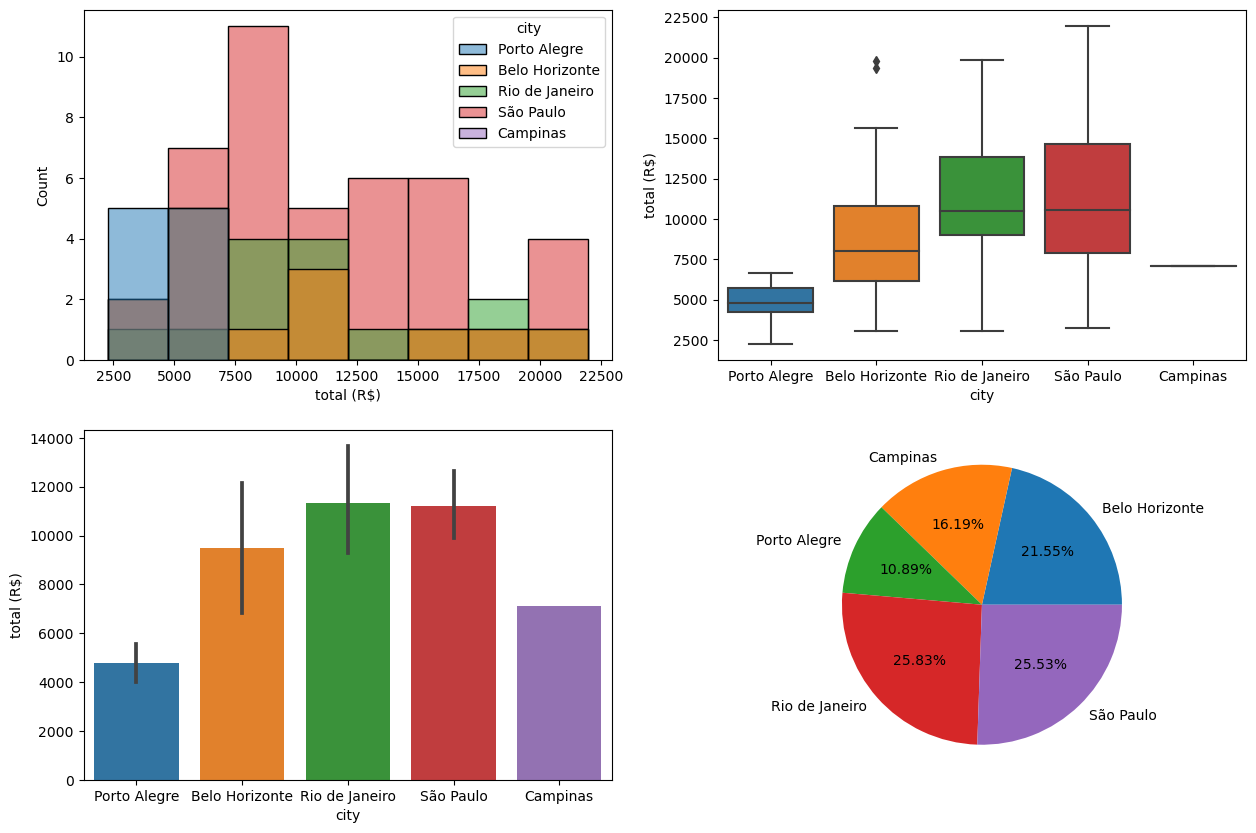

In [56]:
large_fam_analysis_level3("city","total (R$)")

The cities such as, Belo Horizonto and Porto Alegre emerge as suitable options for Large Families
As they offer big area, large number of rooms with affordable rent
